In [36]:
# Author: Irshal Firdeansyah
# Github: github.com/irlfdyh

In [37]:
# IMPORT REQUIRED LIBRARIES

# std libs for classification
import pandas as pd
import numpy as np

# naive bayes for machine learning
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder, LabelEncoder, OrdinalEncoder

# visualization libs
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [38]:
# Prepare dataset

filepath = 'dataset/bankfull01.csv'
text = pd.read_csv(filepath, header=0, delimiter=';', encoding='utf-8')
df = pd.DataFrame(text)
df

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,39,admin.,single,secondary,no,0,yes,no,unknown,6,may,174,2,-1,0,unknown,no
496,496,39,blue-collar,divorced,secondary,no,42,yes,no,unknown,6,may,226,2,-1,0,unknown,no
497,497,50,blue-collar,divorced,secondary,no,41,yes,no,unknown,6,may,190,1,-1,0,unknown,no
498,498,44,blue-collar,married,secondary,no,-99,yes,no,unknown,6,may,111,2,-1,0,unknown,no


In [39]:
# input param for class prediction
x_target = df.drop(['id', 'y'], axis=1)
x_target

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,39,admin.,single,secondary,no,0,yes,no,unknown,6,may,174,2,-1,0,unknown
496,39,blue-collar,divorced,secondary,no,42,yes,no,unknown,6,may,226,2,-1,0,unknown
497,50,blue-collar,divorced,secondary,no,41,yes,no,unknown,6,may,190,1,-1,0,unknown
498,44,blue-collar,married,secondary,no,-99,yes,no,unknown,6,may,111,2,-1,0,unknown


In [40]:
x_target.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [41]:
# target classification from accepted / rejected loan
y_target = df['y']
y_target

0      no
1      no
2      no
3      no
4      no
       ..
495    no
496    no
497    no
498    no
499    no
Name: y, Length: 500, dtype: object

In [42]:
# encode y_target to 2 class 1 and 0
encoder = LabelBinarizer()
y = encoder.fit_transform(y_target)
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [43]:
# encode attribute value to index value
encoder = OrdinalEncoder()
x = encoder.fit_transform(x_target)
x
# labelEncoder = LabelEncoder()
# 
# x = []
# 
# for column in x_target.columns:
#     r = labelEncoder.fit_transform(x_target[column])
#     x.append(r)
# 
# x

array([[36.,  4.,  1., ...,  0.,  0.,  0.],
       [22.,  9.,  2., ...,  0.,  0.,  0.],
       [11.,  2.,  1., ...,  0.,  0.,  0.],
       ...,
       [28.,  1.,  0., ...,  0.,  0.,  0.],
       [22.,  1.,  1., ...,  0.,  0.,  0.],
       [15.,  9.,  2., ...,  0.,  0.,  0.]])

In [44]:
# create data training and datta testing from the dataset with data test = 30% form the instance
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(350, 16)
(350, 1)
(150, 16)
(150, 1)


In [45]:
x_train

array([[36.,  9.,  1., ...,  0.,  0.,  0.],
       [31.,  9.,  0., ...,  0.,  0.,  0.],
       [20.,  1.,  0., ...,  0.,  0.,  0.],
       ...,
       [18.,  0.,  2., ...,  0.,  0.,  0.],
       [23.,  1.,  1., ...,  0.,  0.,  0.],
       [31.,  9.,  1., ...,  0.,  0.,  0.]])

In [46]:
# create model training with NaiveBayes
naive_bayes = MultinomialNB().fit(x_train, np.ravel(y_train, order='C'))
print(naive_bayes)

MultinomialNB()


In [47]:
print(x_test)

[[31.  7.  1. ...  0.  0.  0.]
 [19.  1.  2. ...  0.  0.  0.]
 [22.  9.  1. ...  0.  0.  0.]
 ...
 [14.  4.  1. ...  0.  0.  0.]
 [12.  0.  1. ...  0.  0.  0.]
 [ 3.  7.  1. ...  0.  0.  0.]]


In [48]:
# predict trained model
prediction = naive_bayes.predict(x_test)
accuracies = accuracy_score(y_test, prediction)

print(prediction)
print(accuracies)

[0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1
 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1
 0 1]
0.6466666666666666


In [49]:
# show matrix confusion
print(confusion_matrix(y_test, prediction))

[[96 52]
 [ 1  1]]


In [50]:
# matrix confusion mapping procedure
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('confusion matrix, without normalization')
        
    print(cm)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    # show all ticks
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes,
           yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha='center', va='center', color='white' if cm[i, j] > thresh else 'black')
    
    fig.tight_layout()
    return ax

confusion matrix, without normalization
[[96 52]
 [ 1  1]]
Normalized confusion matrix
[[0.65 0.35]
 [0.5  0.5 ]]


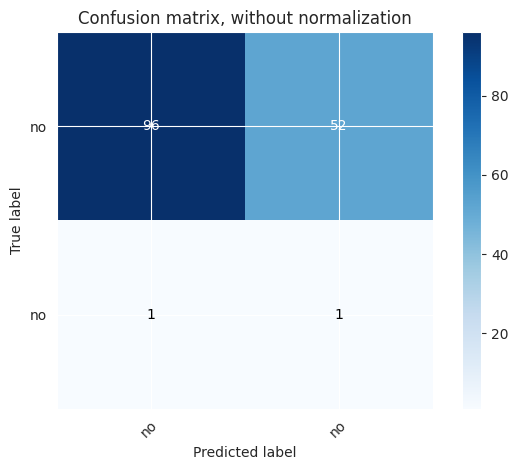

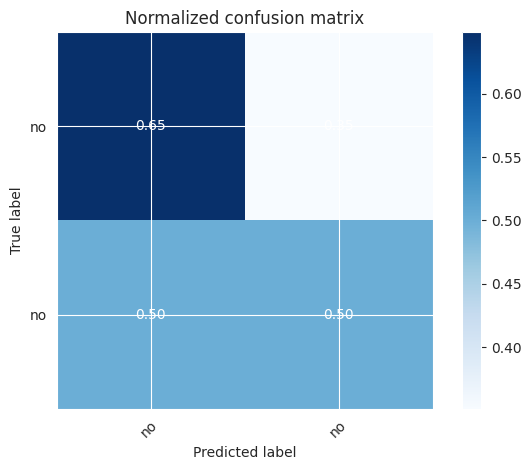

In [51]:
# result visualization
class_name = y_target
np.set_printoptions(precision=2)

# plot non-normalized confusion matrix
plot_confusion_matrix(y_test, prediction, classes=class_name, title='Confusion matrix, without normalization')

# plot normalized confusion matrix
plot_confusion_matrix(y_test, prediction, classes=class_name, normalize=True, title='Normalized confusion matrix')

plt.show()

In [55]:
import pickle

filename = 'model/mv_bank_full.pkl'
pickle.dump(naive_bayes, open(filename, 'wb'))

NameError: name 'naive_baye' is not defined